### Importing Libraries

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Creating our data $\left(\small y = \frac{1}{3} + \frac{2}{3}X  \right)$

In [25]:
# Create X as an array of range 0-300, step 1
X = np.arange(0,301,1).reshape(-1,1)

# Calculate the true y values based on the given formula
y = 1/3 + ((2/3) * X)

# Generate Gaussian (normal) noise
noise = np.random.normal(loc=0, scale=4, size=y.shape)

# Add noise to the true_y to get noisy true y values
y = y + noise

print(f"First 3 entries of X: \n{X[0:3]}\n\n First 3 entries of y: \n{y[0:3]}")

First 3 entries of X: 
[[0]
 [1]
 [2]]

 First 3 entries of y: 
[[5.98306097]
 [7.71890184]
 [5.3589276 ]]


### Feature Scaling using Standarization (Improve Calculation Time)

In [26]:

mu = np.mean(X)    # Compute the mean of X
sig = np.std(X)    # Compute the standard deviation of X
X = (X - mu) / sig   # Perform the standardization


X[0:3]

array([[-1.72630601],
       [-1.71479731],
       [-1.7032886 ]])

### Add a column of ones to our X vector, creating the Design Matrix

In [27]:
# Create a column of ones that matches the number of rows in X
ones = np.ones((np.shape(X)[0], 1))

# Concatenate the column of ones to the front of matrix X
X = np.c_[ones, X]

X[0:3]

array([[ 1.        , -1.72630601],
       [ 1.        , -1.71479731],
       [ 1.        , -1.7032886 ]])

### Iniatlise random weights vector

Where:
- first entry = bias (Intercept)
- second entry = weight (X coeffecient)

In [28]:
weights = np.random.rand(X.shape[1]).reshape(-1,1)

weights

array([[0.44316133],
       [0.82671701]])

### Create our hypothesis function

In [29]:
def hypothesis(X, weights):
    return X @ weights

hypothesis(X, weights)[:3]

array([[-0.98400521],
       [-0.97449077],
       [-0.96497632]])

### Create our Cost function (Measure Model Performance)

In [30]:
# Cost function (MSE)
def cost_function(predicted_y, y):

    cost = np.mean((predicted_y - y) ** 2)
    return cost


### Create our Gradient Descent function

Gradient descent algorithm is given by: $\large \vec{w} =: \vec{w} - \alpha \cdot \nabla J(\vec{w})$

Where our gradient $(\nabla J)$ is given by:  $\large \quad \nabla J(\vec{w}) = \frac{1}{m} X^T(X\vec{w}-y)$

In [31]:
def gradient_descent(X,y, weights, learning_rate= 0.0003, stopping_threshold= 1E-12):

    # Variable to track current epoch 
    epoch = 0

    # Track Cost's history for Convergence Monitoring
    cost_history = []
    
    # Intialise previous cost as infinity
    prev_cost = float('inf')

    # Number of training examples
    m = len(y)

    # Loop until cost convergence
    while True:

        # Calculate predicted y values
        predicted_y = hypothesis(X, weights)

        # Error in predicted y values vs true y values
        error = predicted_y - y
        
        # Calculate cost with current weights
        cost = cost_function(predicted_y, y)

        # Calculate Gradient
        gradient = (X.T  @ error) / m

        # Update Weights
        weights = weights - learning_rate * gradient
        
        # If change in cost from one epoch to another is less than our stopping threshold declare convergence.
        if np.abs(cost - prev_cost) < stopping_threshold:
            print("-" * 60 + "\n")
            print(f"Convergence reached at Epoch: {epoch}")
            break
        
        # Else, update our previous cost and add to our cost history
        prev_cost = cost
        cost_history.append(cost)

        

        # Printing Epoch and Cost
        if epoch % 1000 == 0 and epoch != 0:
            prev_cost = cost
            print(f"Epoch {epoch}: Cost {cost}")
        
        epoch +=1

    return  epoch, weights, cost_history


epoch, weights, cost_history = gradient_descent(X,y, weights)



Epoch 1000: Cost 7267.529383667868
Epoch 2000: Cost 3995.643741519901
Epoch 3000: Cost 2200.1564625961278
Epoch 4000: Cost 1214.8608498005774
Epoch 5000: Cost 674.1678268034731
Epoch 6000: Cost 377.45591484409783
Epoch 7000: Cost 214.63162277059365
Epoch 8000: Cost 125.27980027662917
Epoch 9000: Cost 76.24689442871987
Epoch 10000: Cost 49.33948740798139
Epoch 11000: Cost 34.57371858274538
Epoch 12000: Cost 26.47082227496574
Epoch 13000: Cost 22.024258783980027
Epoch 14000: Cost 19.584152662865794
Epoch 15000: Cost 18.245114573255233
Epoch 16000: Cost 17.51030103792969
Epoch 17000: Cost 17.107063119689542
Epoch 18000: Cost 16.8857813782825
Epoch 19000: Cost 16.764350315216994
Epoch 20000: Cost 16.697713533603384
Epoch 21000: Cost 16.66114578436598
Epoch 22000: Cost 16.641078784551276
Epoch 23000: Cost 16.630066772875445
Epoch 24000: Cost 16.624023796732097
Epoch 25000: Cost 16.62070763963525
Epoch 26000: Cost 16.61888785785387
Epoch 27000: Cost 16.617889230335606
Epoch 28000: Cost 16.61

### Plot Cost vs Epochs

Text(0, 0.5, 'Cost')

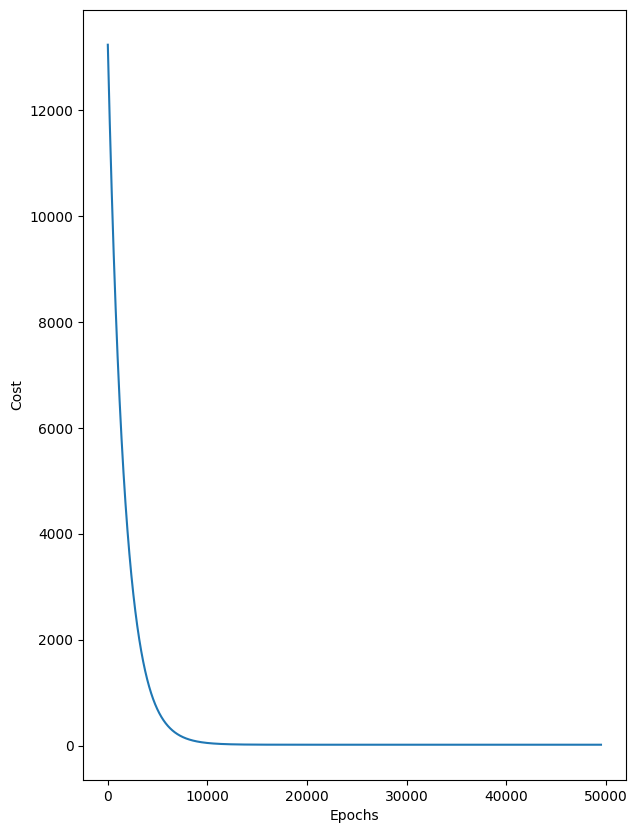

In [32]:
plt.figure(figsize=(7,10))
plt.plot(np.arange(epoch), cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")

### Destandardise weights $\scriptsize (\beta + \omega)$

In [33]:
weights_0_prime = weights[0] - (weights[1] * mu) / sig
weights_1_prime = weights[1] / sig

weights = np.array([weights_0_prime, weights_1_prime])
weights

array([[0.67321983],
       [0.66432908]])

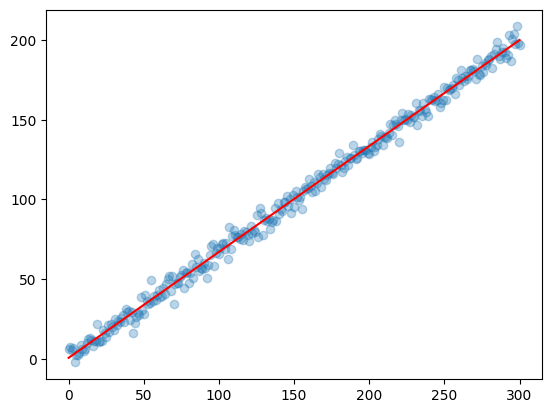

In [34]:
X_b = np.arange(0,301,1).reshape(-1, 1)  # Ensuring true_X is a 2D array
ones = np.ones((X_b.shape[0], 1))
X_b = np.hstack((ones, X_b))  # Now true_X and ones have compatible dimensions
true_y = 1/3 + ((2/3) * X_b)

X_values = np.arange(0,301,1)
true_y = 1/3 + ((2/3) * X_values)

pred_y = hypothesis(X_b, weights)


pred_y.shape

plt.scatter(X_values, y, alpha=0.3)
plt.plot(X_values, pred_y, c= 'red')




### True Answers

In [35]:
X[:,1] = (X[:,1] * sig) + mu # Destandardise Second Column
weights = np.linalg.pinv(X.T @ X) @ X.T @ y # Use normal equation to calculate weights
weights

array([[0.67322042],
       [0.66432931]])